In [1]:
import pandas as pd
import numpy as np

# Generating the 'Messy' Data for your contract
data = {
    'Transaction_ID': range(101, 121),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Beauty'], 20),
    'Product_Name': [f'Product_{i}' for i in range(20)],
    'Price': [f"${np.random.randint(10, 500)}.00" for _ in range(20)],
    'Quantity': np.random.randint(1, 5, 20),
    'Customer_ID': [f"CUST_{i}" if i%5!=0 else np.nan for i in range(20)]
}
df_messy = pd.DataFrame(data)

In [2]:
df_messy

,Transaction_ID,Category,Product_Name,Price,Quantity,Customer_ID
0,101,Clothing,Product_0,$341.00,2,NaN
1,102,Beauty,Product_1,$259.00,1,CUST_1
2,103,Beauty,Product_2,$397.00,2,CUST_2
3,104,Electronics,Product_3,$362.00,3,CUST_3
4,105,Clothing,Product_4,$259.00,1,CUST_4
5,106,Home,Product_5,$300.00,4,NaN
6,107,Home,Product_6,$411.00,3,CUST_6
7,108,Clothing,Product_7,$336.00,4,CUST_7
8,109,Beauty,Product_8,$195.00,1,CUST_8
9,110,Beauty,Product_9,$240.00,3,CUST_9


# **1. DATA CLEANING**

In [3]:
import pandas as pd
df_messy['Price'].dtypes

dtype('O')

#- Converting "Price" column from string to float.

In [4]:
df_messy['Price'] = df_messy['Price'].replace('[\$,₹,]', '', regex=True)
df_messy['Price'] = pd.to_numeric(df_messy['Price'], errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3693277066.py:1: SyntaxWarning: invalid escape sequence '\$'
  df_messy['Price'] = df_messy['Price'].replace('[\$,₹,]', '', regex=True)


In [5]:
import pandas as pd
df_messy['Price'].dtypes

dtype('float64')

# -Filling missing "Customer_ID" values with the string "GUEST'

In [6]:
df_messy['Customer_ID'] = df_messy['Customer_ID'].fillna('GUEST')

In [7]:
df_messy

,Transaction_ID,Category,Product_Name,Price,Quantity,Customer_ID
0,101,Clothing,Product_0,341.0,2,GUEST
1,102,Beauty,Product_1,259.0,1,CUST_1
2,103,Beauty,Product_2,397.0,2,CUST_2
3,104,Electronics,Product_3,362.0,3,CUST_3
4,105,Clothing,Product_4,259.0,1,CUST_4
5,106,Home,Product_5,300.0,4,GUEST
6,107,Home,Product_6,411.0,3,CUST_6
7,108,Clothing,Product_7,336.0,4,CUST_7
8,109,Beauty,Product_8,195.0,1,CUST_8
9,110,Beauty,Product_9,240.0,3,CUST_9


# **2. FEATURE ENGINEERING**

# -Creating a "Total_Cost" column (Quantity * Price)

In [8]:
df_messy['Total_Cost'] = df_messy['Price'] * df_messy['Quantity']

# **3. PERFORMANCE LOGIC**

# -Calculating the z_score of revenue within each category.

In [9]:
df_messy['z_score'] = df_messy.groupby('Category')['Total_Cost'].transform(lambda x: (x - x.mean()) / x.std())

In [10]:
df_messy

,Transaction_ID,Category,Product_Name,Price,Quantity,Customer_ID,Total_Cost,z_score
0,101,Clothing,Product_0,341.0,2,GUEST,682.0,-0.167944
1,102,Beauty,Product_1,259.0,1,CUST_1,259.0,-0.699637
2,103,Beauty,Product_2,397.0,2,CUST_2,794.0,0.994055
3,104,Electronics,Product_3,362.0,3,CUST_3,1086.0,0.707107
4,105,Clothing,Product_4,259.0,1,CUST_4,259.0,-1.295572
5,106,Home,Product_5,300.0,4,GUEST,1200.0,-0.707107
6,107,Home,Product_6,411.0,3,CUST_6,1233.0,0.707107
7,108,Clothing,Product_7,336.0,4,CUST_7,1344.0,1.596805
8,109,Beauty,Product_8,195.0,1,CUST_8,195.0,-0.902247
9,110,Beauty,Product_9,240.0,3,CUST_9,720.0,0.759787


# -Superstar Products from each Category.

In [11]:
idx_max = df_messy.groupby('Category')['z_score'].idxmax()
df_messy.iloc[idx_max]

,Transaction_ID,Category,Product_Name,Price,Quantity,Customer_ID,Total_Cost,z_score
16,117,Beauty,Product_16,251.0,4,CUST_16,1004.0,1.658869
7,108,Clothing,Product_7,336.0,4,CUST_7,1344.0,1.596805
3,104,Electronics,Product_3,362.0,3,CUST_3,1086.0,0.707107
6,107,Home,Product_6,411.0,3,CUST_6,1233.0,0.707107


# **4. SUMMARY TABLE**

In [12]:
# Group by category
grouped = df_messy.groupby('Category')

# 1. Total and average revenue per category
revenue_summary = grouped['Total_Cost'].agg(
    total_revenue='sum',
    avg_revenue='mean'
).reset_index()

# 2. Get product with max price in each category
idx_max_price = grouped['Total_Cost'].idxmax()
max_price_products = df_messy.loc[idx_max_price, ['Category', 'Product_Name']]
max_price_products = max_price_products.rename(columns={'Product_Name': 'max_price_product'})

# 3. Merge both summaries
final_df = pd.merge(revenue_summary, max_price_products, on='Category')

print(final_df)


      Category  total_revenue  avg_revenue max_price_product
0       Beauty         3840.0        480.0        Product_16
1     Clothing         5960.0        745.0         Product_7
2  Electronics         1250.0        625.0         Product_3
3         Home         2433.0       1216.5         Product_6


# -Visualization (a bar chart) comparing the Total Revenue of each category

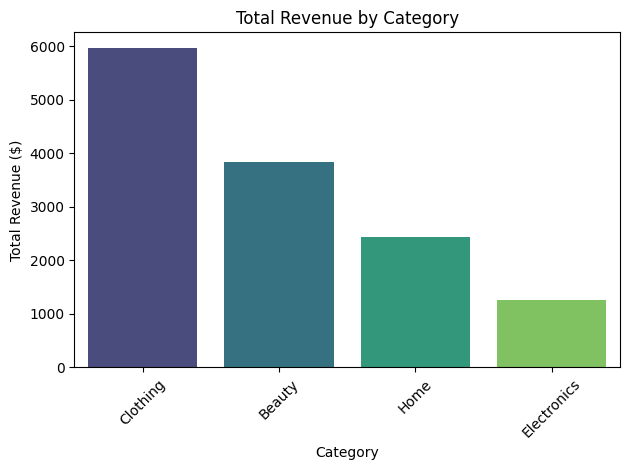

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Sort the DataFrame by revenue (Descending)
df_sorted = final_df.sort_values('total_revenue', ascending=False)

# 2. Generate the bar chart
# 'hue' is assigned to 'category' to give each bar a distinct color
sns.barplot(x='Category', y='total_revenue', data=df_sorted, hue='Category', palette='viridis')

# 3. Add labels and title
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue ($)')

# 4. Optional: Rotate labels if they are long or overlapping
plt.xticks(rotation=45)

# 5. Save the result
plt.tight_layout()
plt.savefig('revenue_bar_chart.png')